In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
DF=pd.read_csv('Advertising[1].csv')
DF

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
DF.drop(DF.columns[0],axis=1,inplace=True)
DF

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:xlabel='Sales', ylabel='Count'>

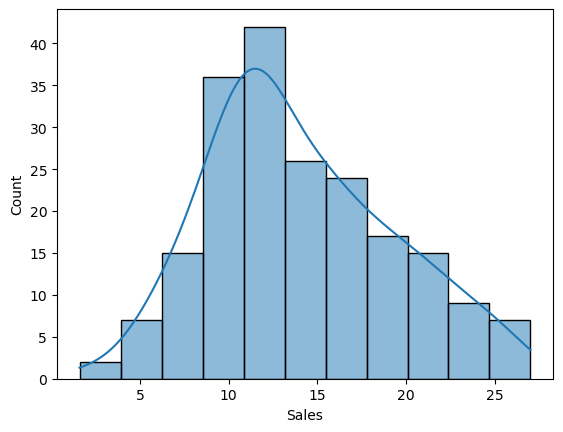

In [5]:
sns.histplot(x='Sales',kde=True,data=DF)

In [6]:
DF.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
# There are no missing values or NAN

In [8]:
DF.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# All values of  columns are float

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [12]:
np.random.seed(42)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(DF.iloc[:,:-1],DF.iloc[:,-1],test_size=0.3,random_state=42)

In [14]:
print("Training size is:",X_train.shape,y_train.shape)
print("Testing size is:",X_test.shape,y_test.shape)

Training size is: (140, 3) (140,)
Testing size is: (60, 3) (60,)


In [15]:
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.fit_transform(X_test)

In [16]:
model=LinearRegression()

In [17]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [18]:
y_pred_train=model.predict(X_train_scaled)

In [19]:
y_pred=model.predict(X_test_scaled)

In [20]:
model.score(X_train_scaled,y_train)

0.9055159502227753

In [21]:
model.score(X_test_scaled,y_test)

0.7725767303950063

In [22]:
r2_score(y_test,y_pred)

0.7725767303950063

In [23]:
r2_score(y_train,y_pred_train)

0.9055159502227753

In [24]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Square error is:",mse)

Mean Square error is: 6.209703302450424


In [25]:
model.coef_

array([3.68334078, 2.90625242, 0.14194772])

In [26]:
model.intercept_

14.497142857142858

In [27]:
pd.DataFrame(model.coef_,X_train.columns,columns=['coefficients'])

,coefficients
TV,3.683341
Radio,2.906252
Newspaper,0.141948


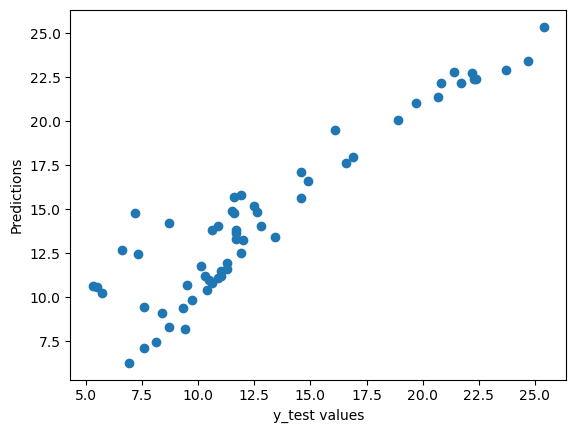

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test values')
plt.ylabel('Predictions');

In [29]:
A=pd.DataFrame({'TV':np.array(X_test.iloc[:,-3]),'Sales':y_pred.flatten()})


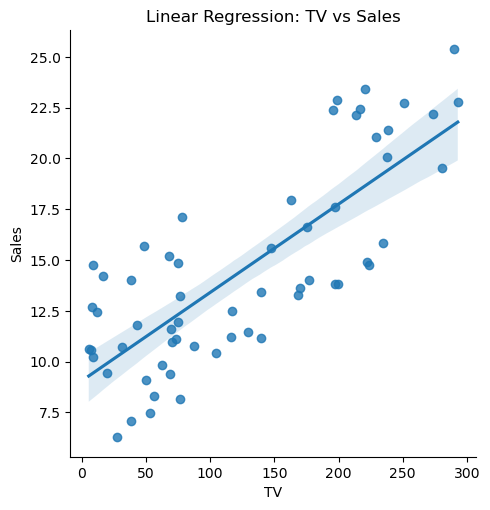

In [30]:
sns.lmplot(x='TV',y='Sales',data=A)
plt.title('Linear Regression: TV vs Sales');

In [36]:
y_pred.flatten().shape

(60,)

In [44]:
X_test['Sales']=y_pred.flatten()
C=X_test
C.shape

(60, 4)

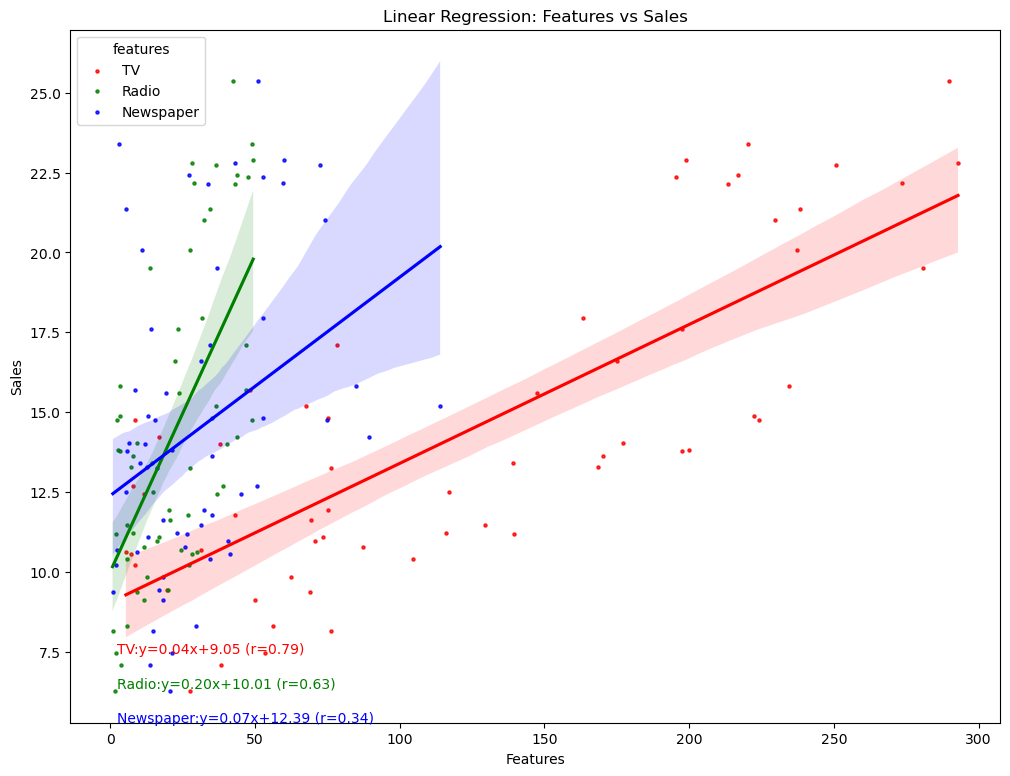

In [45]:
from scipy.stats import linregress
text_y_start=0.1
text_y_delta=0.05

fig=plt.figure(figsize=(12,9))
features = ['TV','Radio','Newspaper']
colors=['red','green','blue']


for i,(features,color) in enumerate(zip(features,colors)):
    sns.regplot(x=features,y='Sales',data=C, color=color,label=features,scatter_kws={'s':5})
    slope,intercept,r_value,p_value,std_err=linregress(C[features],C['Sales'])
    equation_text=f'{features}:y={slope:.2f}x+{intercept:.2f} (r={r_value:.2f})'

    plt.text(0.05,text_y_start-i*text_y_delta,equation_text,transform=plt.gca().transAxes,color=color)

plt.legend(title='features')
plt.title('Linear Regression: Features vs Sales')
plt.xlabel('Features')
plt.ylabel('Sales')
plt.savefig('E:/Analysis,Visulaization/HW3/LRA.png')

The above graph shows that feature ‘TV’ has positive linear relation with ‘Sales’ i.e, With the increase in number of TV, 
Sales increases linearly.  All positive value of r indicates sales increases with increase in number of TV,radio and newspapers.
For all other features, relation is moderate with Sales.We can see only TV has significant relation with sales.